<h1 style='text-align:center; font-weight:bolder'>
    Modelo de Churn
</h1>

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

## **Datos**

In [3]:
df = pd.read_csv('Datos/Crudos/Telco_churn.csv')

## **EDA**

In [4]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6810,7758-XKCBS,Male,0,No,No,15,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.7,438.25,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Setting churn**

In [7]:
df = pd.merge(df.reset_index(), pd.get_dummies(df['Churn']).reset_index(), how='left', left_on='index', right_on='index')

In [8]:
df.drop(['index', 'Churn', 'No'], axis=1, inplace=True)

In [9]:
df.rename(columns={'Yes': 'Churn'}, inplace=True)

In [10]:
variables = ['gender', 'SeniorCitizen']

In [11]:
df.groupby(['gender', 'Churn'])[['SeniorCitizen']].count()

SeniorCitizen
gender Churn               
Female 0               2549
       1                939
Male   0               2625
       1                930

In [12]:
temp_df = pd.DataFrame(df['gender'].value_counts() / len(df))

In [13]:
temp_df = df.groupby(['gender', 'Churn'])[['customerID']].count()
# temp_df['%'] = temp_df['customerID'].apply(lambda x: round(x/temp_df['customerID'].sum()*100, 2))

In [14]:
pd.crosstab(index=df['gender'], columns=df['Churn'], normalize='index')

Churn,0,1
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


In [15]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [16]:
variables = ['gender', 'SeniorCitizen', 'MultipleLines', 'InternetService']

In [17]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

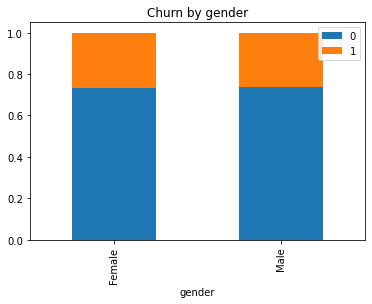

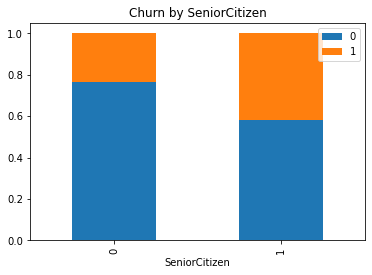

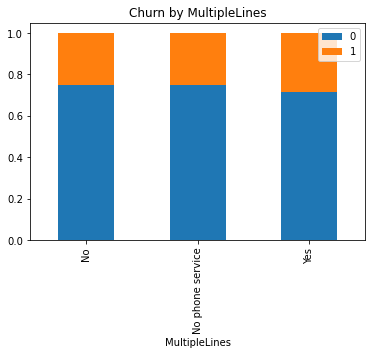

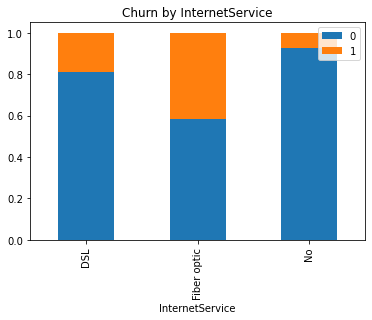

In [18]:
for i in variables:

    pd.crosstab(index=df[f'{i}'], columns=df['Churn'], normalize='index').plot(kind='bar', stacked=True)
    plt.title(f'Churn by {i}')

    # addlabels(x, y)
    plt.legend(loc='upper right')

    plt.show()
    print('\n')